## The Limit Order Book  & Coinbase ## 

### Level 1 Orderbook ###
 
Includes only prices at the best ask and best bid, and the volumes at those prices. 

### Level 2 Orderbook ###

Includes the 50 best bid and the 50 best ask prices, and the (aggregated) volume at those prices. 

### Level 3 Orderbook ###

The full order book. The volumes at each price level are not aggregated, so it is possible to see the size of the individual orders. 


#### Illustration 


![title](img/LOB.jpg)


### Coinbase ### 

https://pro.coinbase.com/trade/BTC-USD




In [38]:
import cbpro
public_client = cbpro.PublicClient()
raw_data = public_client.get_product_order_book('BTC-USD', level=2)

In [39]:
raw_data

{'bids': [['50897.91', '0.5', 1],
  ['50895.73', '0.03212', 1],
  ['50895.62', '0.03212', 1],
  ['50895.37', '0.28', 1],
  ['50894.69', '1.66617404', 1],
  ['50894.68', '0.5', 1],
  ['50892.14', '0.9262', 2],
  ['50891.85', '3.05257737', 4],
  ['50890.99', '0.06', 1],
  ['50885.8', '0.10230404', 1],
  ['50885.79', '0.26471208', 1],
  ['50885.26', '0.56', 1],
  ['50884.43', '1.54702585', 1],
  ['50884.19', '0.05', 1],
  ['50879.34', '0.02884', 1],
  ['50879.13', '0.0412', 1],
  ['50877.32', '0.1', 1],
  ['50873.1', '0.39303112', 1],
  ['50873.05', '0.1', 1],
  ['50871.32', '0.1', 1],
  ['50870.76', '0.39301507', 1],
  ['50869.07', '0.0883', 1],
  ['50867.93', '0.39307131', 1],
  ['50866.97', '0.20050079', 1],
  ['50866.38', '0.182', 1],
  ['50865.57', '0.182', 1],
  ['50864.71', '0.182', 1],
  ['50862.83', '0.8', 1],
  ['50862.78', '0.18495329', 1],
  ['50861.55', '1', 1],
  ['50859.9', '0.0388', 1],
  ['50852.05', '0.59', 1],
  ['50848.62', '0.06506', 1],
  ['50848.47', '0.41372664', 1

### The extracted order book needs to be transformed into useful features 

##### Stationairy Features

Paper: "Using Deep Learning for price prediction by exploiting stationary limit order book features"
Link: https://arxiv.org/abs/1810.09965v1

Price levels are transformed to the percentage difference from the current mid price. 


##### Order-Flow Metrics

Paper: "Multi-Level Order-Flow Imbalance in a Limit Order Book"
Link: https://arxiv.org/pdf/1907.06

Metrics for number of market orders, limit orders and canceled orders are included. 



##### Example

The following dataset was created by saving the 15 best ask, and 15 best bid prices in the limit order book of the cryptocurrency Litecoin every second for ~24 hours and then transforming the data into features according to the papers. 

The data is collected using the following framework: https://github.com/sadighian/crypto-rl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("demo_LTC-USD_20190926.csv")

In [40]:
df.head(5)

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2019-09-26 20:36:38.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
1,2019-09-26 20:36:39.067000+00:00,53.825,0.01,0.0,5.500119,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
2,2019-09-26 20:36:40.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
3,2019-09-26 20:36:41.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
4,2019-09-26 20:36:42.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0


In [5]:
df.tail(5)

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
91397,2019-09-27 21:59:55.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001151,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91398,2019-09-27 21:59:56.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91399,2019-09-27 21:59:57.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91400,2019-09-27 21:59:58.067000+00:00,56.475,0.03,0.0,0.0,-0.000266,-0.000620,-0.000797,-0.000974,-0.001505,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91401,2019-09-27 21:59:59.067000+00:00,56.460,0.04,0.0,0.0,-0.000354,-0.000708,-0.001240,-0.001417,-0.001948,...,0.0,0,0.0,0,0,0.0,0,0,0,0


## Features ##

Midpoint = $\frac{LowestAsk + HighestBid}{2}$

Spread = LowestAsk - HighestBid

"Distance" features:  Difference between the price level and the current mid price 

"Notional" features: Price*Quantity 

"Market": Orders executed instantly at the current market price 

"Limit": Orders set to execute at a certain price 

"Cancel": Cancelled Orders  


In [8]:
df.columns.values

array(['system_time', 'midpoint', 'spread', 'buys', 'sells',
       'bids_distance_0', 'bids_distance_1', 'bids_distance_2',
       'bids_distance_3', 'bids_distance_4', 'bids_distance_5',
       'bids_distance_6', 'bids_distance_7', 'bids_distance_8',
       'bids_distance_9', 'bids_distance_10', 'bids_distance_11',
       'bids_distance_12', 'bids_distance_13', 'bids_distance_14',
       'bids_notional_0', 'bids_notional_1', 'bids_notional_2',
       'bids_notional_3', 'bids_notional_4', 'bids_notional_5',
       'bids_notional_6', 'bids_notional_7', 'bids_notional_8',
       'bids_notional_9', 'bids_notional_10', 'bids_notional_11',
       'bids_notional_12', 'bids_notional_13', 'bids_notional_14',
       'bids_cancel_notional_0', 'bids_cancel_notional_1',
       'bids_cancel_notional_2', 'bids_cancel_notional_3',
       'bids_cancel_notional_4', 'bids_cancel_notional_5',
       'bids_cancel_notional_6', 'bids_cancel_notional_7',
       'bids_cancel_notional_8', 'bids_cancel_notiona

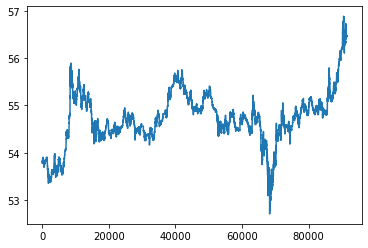

In [11]:
plt.plot(df["midpoint"])

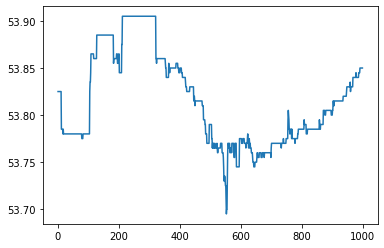

In [12]:
plt.plot(df["midpoint"][1:1000])

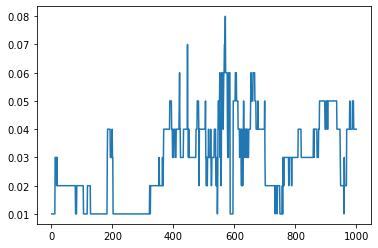

In [12]:
plt.plot(df["spread"][1:1000])

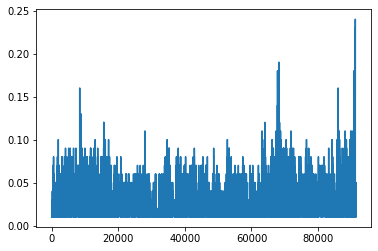

In [23]:
plt.plot(df["spread"])

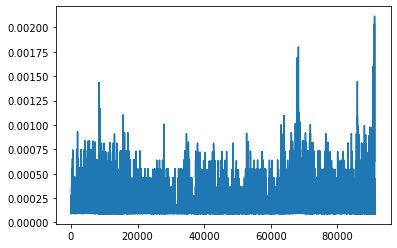

In [55]:
plt.plot(df["asks_distance_0"])

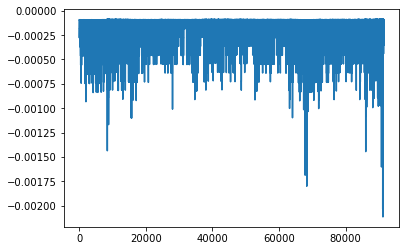

In [13]:
plt.plot(df["bids_distance_0"])

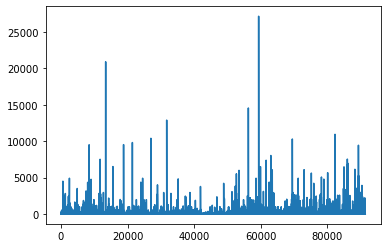

In [27]:
plt.plot(df["asks_market_notional_0"])

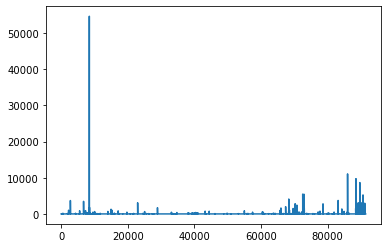

In [56]:
plt.plot(df["asks_market_notional_1"])

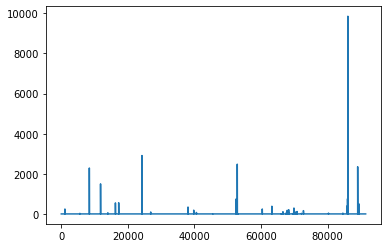

In [57]:
plt.plot(df["asks_market_notional_2"])

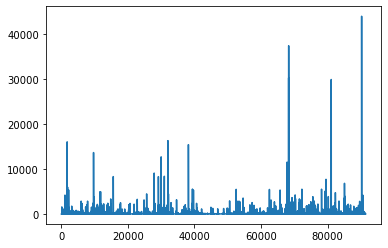

In [58]:
plt.plot(df["bids_market_notional_0"])

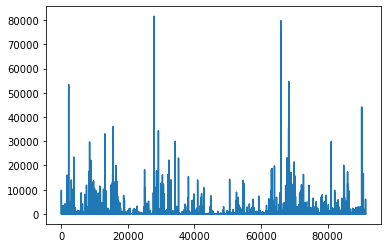

In [14]:
plt.plot(df["sells"])

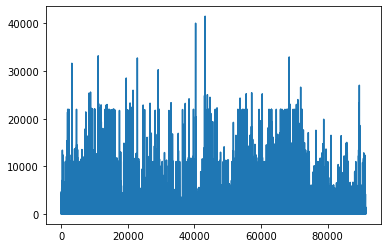

In [60]:
plt.plot(df["bids_cancel_notional_0"])

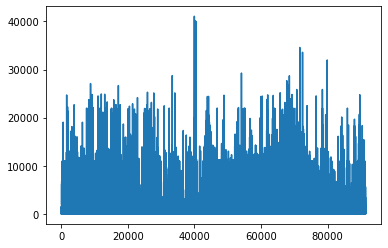

In [61]:
plt.plot(df["bids_cancel_notional_1"])

## Deep Learning ##

### Relevant Papers ###

###### Feature engineering for mid-price prediction with deep learning

Paper: https://arxiv.org/abs/1904.05384

Results: Features from High Frequency Financial Econometrics can be useful for improving the performance of a deep learning model for midprice prediction. 


######  Deep learning for limit order books

Paper: https://arxiv.org/abs/1601.01987

Models the joint probability distribution of the best bid and ask prices. 
The probability distribution is useful as it allows for applications in risk management.

Results: Develops "Spatial neural networks" which outperforms standard neural networks in the tails of the probability distribtion (important for risk management). 

Note: In high frequency setting, financial markets have a large amount of noise. Modelling the noise is just as important as modeling the most likely outcome. \
Results: 

###### VLSTM: Very Long Short-Term Memory Networks for High-Frequency Trading

Paper: https://arxiv.org/abs/1809.01506

LSTM (Long Short-Term Mememory) Networks are very useful for time-series prediction. However, the author argues that they are not well suited for the sequences that are thousands of datapoints long, which can occur when dealing with high frequency data. The author proposes VLSTM (Very Long Short-Term Memory) networks for high freuqency data, and shows that they indeed provide superior performance in terms of prediction the midprice movement of a limit order book. 



### Tensorflow Test 

Koden herunder er bare en hurtig test af at jeg kan få tensorflow til at køre

In [26]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers.experimental import preprocessing

In [27]:
X = df.drop("system_time", axis = 1).iloc[:(len(df)-1)]

In [28]:
Y = df["midpoint"].iloc[1:]

In [29]:
Y = Y.reset_index(drop = True)

In [30]:
X["Y"] = Y

In [31]:
train_dataset = X[:73120]
test_dataset = X.drop(train_dataset.index)

In [32]:
train_y = train_dataset.pop("Y")
test_y = test_dataset.pop("Y")

In [23]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [35]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(154, activation = "relu"),
    layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 154)               309       
_________________________________________________________________
dense_2 (Dense)              (None, 154)               23870     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 155       
Total params: 24,334
Trainable params: 24,025
Non-trainable params: 309
_________________________________________________________________


In [37]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')

In [39]:
%%time
history = model.fit(
    train_dataset, train_y,
    epochs=250,
    batch_size = 100,
    verbose=0,
    validation_split = 0.2)

CPU times: user 4min 32s, sys: 48.8 s, total: 5min 21s
Wall time: 3min 6s


In [41]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
245,0.210750,116.725693,245
246,0.176190,110.322403,246
247,0.128053,122.138512,247
248,0.104635,122.659874,248
249,0.194914,119.606239,249


In [52]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 300])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

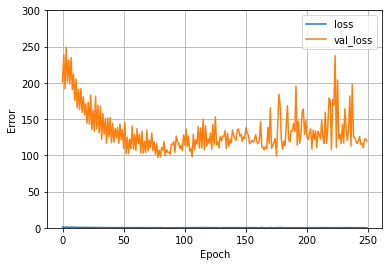

In [53]:
plot_loss(history)

In [44]:
pred = model.predict(test_dataset)

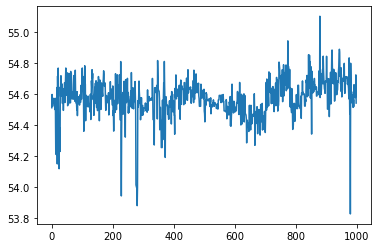

In [45]:
plt.plot(pred[1:1000])

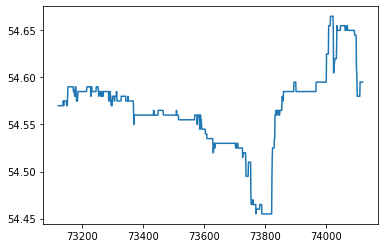

In [47]:
plt.plot(test_y[1:1000,])